In [1]:
# Correlations Charts - 2021 data for Greektown

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import style
%matplotlib inline

In [3]:
pd.set_option('max_colwidth', 250)

In [4]:
pd.set_option('display.max_rows', 200)

In [5]:
data_2021 = "./temp/corridors_vacants_2021.csv"
df_2021 = pd.read_csv(data_2021)
df_2021

,Corridor,Population,Total households,Household population,Pop. density per sq mile,Income_past_12mos_below_pov_level,Persons_poverty_status_determined,Pop_16_yrs_and_over,Pop_in_labor_force,Pop_NOT_in_labor_force,...,"Finance, insurance, real estate","Professional, scientific, mgmt, administrative","Educational services, health care, social assistance","Accommodations, food services, arts, entertainment",Public administration,Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months,Year
0,Belair Rd,35458,12487,33302,8265.4,7420,33273,27588,16396,11192,...,5.8,12.0,30.7,8.0,11.3,18,43,206,207,2021
1,Brooklyn,13989,5613,13954,6284.4,3203,13938,11356,7586,3770,...,4.9,13.8,26.2,8.1,8.1,16,94,323,300,2021
2,E Monument St,48947,19537,48257,10155.1,12082,48357,38934,24444,14490,...,5.7,13.0,37.0,8.7,7.1,35,141,359,379,2021
3,Greektown,10968,3832,10821,4134.0,1118,10631,8559,5908,2651,...,7.9,15.5,20.3,12.8,4.1,9,27,192,201,2021
4,Hamilton Lauraville,36997,13384,35548,7548.4,5274,35323,28914,18848,10066,...,5.9,11.6,33.1,6.7,8.1,25,107,383,369,2021
5,Hampden,27062,8497,19748,9370.7,2467,19829,23804,12242,11562,...,6.9,13.1,35.3,10.3,5.6,38,80,181,163,2021
6,Highlandtown,26400,11368,25721,6478.9,4471,25936,21875,14404,7471,...,8.7,13.3,29.9,7.1,7.9,39,91,318,332,2021
7,Irvington,11585,4633,11291,5826.8,1839,11334,9565,6193,3372,...,3.3,11.2,29.4,7.8,6.1,6,44,111,112,2021
8,North Ave,15602,5403,15490,10767.0,4929,15452,12543,6784,5759,...,5.0,10.3,30.7,9.9,9.1,7,109,174,173,2021
9,Park Heights,14908,6156,14475,12257.5,3772,14737,12587,6940,5647,...,5.1,13.9,37.6,7.3,6.9,7,41,172,170,2021


In [27]:
# Filter row that contains Greektown
Greektown = df_2021[df_2021['Corridor'].str.contains("Greektown" OR 'Pigtown')]
Greektown

SyntaxError: invalid syntax (1578414365.py, line 2)

In [7]:
Greektown.columns

Index(['Corridor', 'Population', 'Total households', 'Household population',
       'Pop. density per sq mile', 'Income_past_12mos_below_pov_level',
       'Persons_poverty_status_determined', 'Pop_16_yrs_and_over',
       'Pop_in_labor_force', 'Pop_NOT_in_labor_force', 'Employed_civilians',
       'Unemployed_civilians', 'Workers_16_yrs_and_over',
       'Population_25_yrs_and_over', '# persons 12th grade, no diploma',
       '# persons graduated high school', '# persons Associate's degree',
       '# persons Bachelor's degree', 'Pop. Asian', 'Pop. Black',
       'Pop. Hispanic origin', 'Pop. white', 'Pop. two or more races',
       '# Foreign-born', 'Total pop. in occupied housing units by tenure',
       'Total occupied units', 'Total owner-occupied units',
       'Total renter-occupied units',
       'No_vehicle_available_owneroccupied_unit',
       'No_vehicle_available_renteroccupied_unit',
       '# households with computer, no internet subscription',
       '# households no com

In [8]:
not_labor_force = Greektown.sort_values(by=["Pop_NOT_in_labor_force"], ascending=False)
not_labor_force = not_labor_force[["Corridor", "Pop_NOT_in_labor_force"]]
not_labor_force

,Corridor,Pop_NOT_in_labor_force
3,Greektown,2651


In [9]:
# compare number vacancies with demographics, use smaller dfs for simplicity
vacancies_df = Greektown[["Business vacancies >24 months", "Pop. density per sq mile", "Percent earned Bachelor's degree", "Home ownership rate",
                       "Poverty rate", "Unemployment rate", "Percent no computer", "Percent Black", "Percent working age"]]



In [10]:
# Pearson's correlation
#  r < 0.3 none or very weak correlation
#  0.3 < or = r < 0.5  weak correlation
#  0.5 < or = r < 0.7  moderate correlation
#  r > or = 0.7 strong correlation

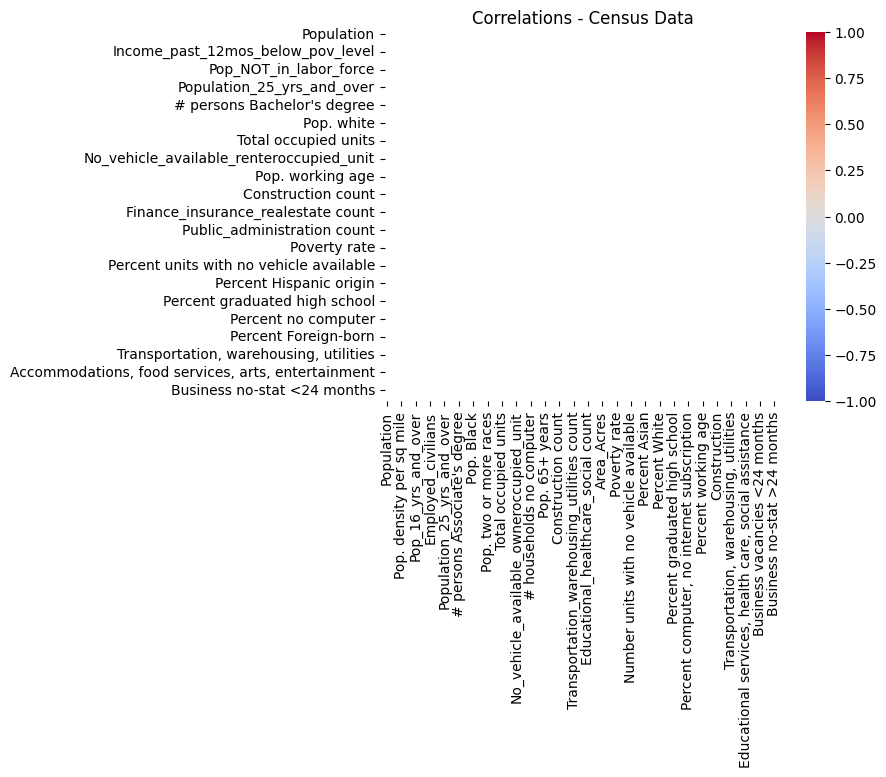

In [11]:

# CORRELATIONS
# See https://www.youtube.com/watch?v=0U9cs2V-Mqc; 
# https://heartbeat.comet.ml/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07
# Plot - Pearson correlation

sns.heatmap(Greektown.corr(),annot = True, annot_kws={"fontsize":6},vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.title('Correlations - Census Data')
plt.show()



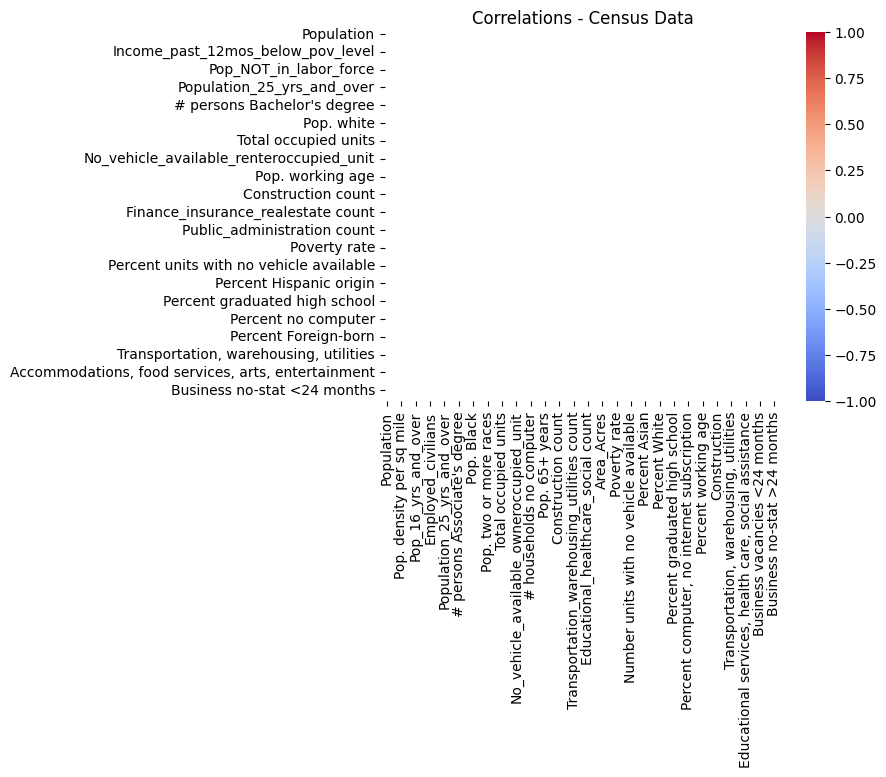

In [23]:
# only need the bottom half of the matrix as the top right "triangle" is redundant

corr = Greektown.corr()

matrix = np.triu(corr)

# make heatmap using Seaborn "coolwarm" colormap
sns.heatmap(corr,annot = True, mask=matrix, annot_kws={"fontsize":6},vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.title('Correlations - Census Data')
plt.show()

# Save graph as a png file
#plt.savefig("correlation.png")


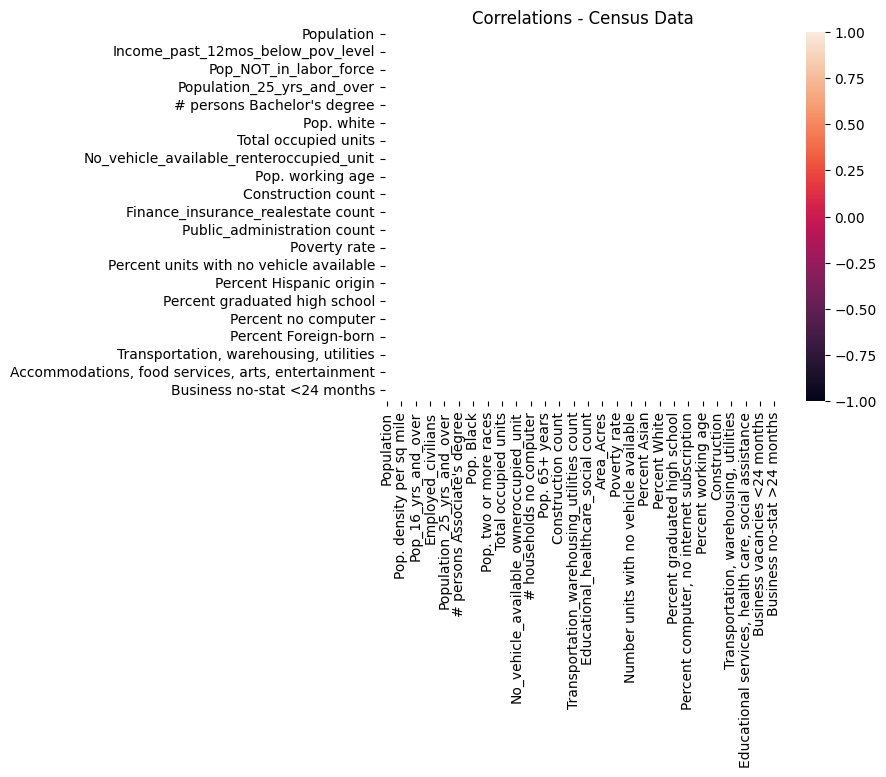

In [24]:
# only need the bottom half of the matrix as the top right "triangle" is redundant

corr = Greektown.corr()

matrix = np.triu(corr)

# # using "rocket" color map: use _r to reverse, ex. "rocket_r"
sns.heatmap(corr,annot = True, mask=matrix, annot_kws={"fontsize":6},vmin=-1, vmax=1, center=0, cmap='rocket')
plt.title('Correlations - Census Data')
plt.show()

# Save graph as a png file
#plt.savefig("correlation.png")

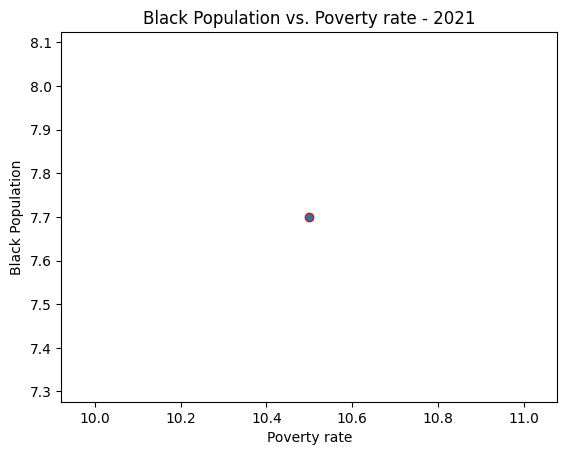

In [25]:
# create scatterplot
corr = Greektown['Corridor']
pop = Greektown['Population']
povcount = Greektown['Poverty rate']
Black = Greektown['Percent Black']

plt.scatter(povcount, Black, edgecolors='r')

#x-axis labels 
plt.xlabel('Poverty rate') 

#y-axis labels 
plt.ylabel('Black Population') 

#plot title 
plt.title('Black Population vs. Poverty rate - 2021') 

plt.show()

In [15]:
# Show corridor with largest # of working age population
df_2021[ df_2021['Pop. working age'] == df_2021['Pop. working age'].max()]

,Corridor,Population,Total households,Household population,Pop. density per sq mile,Income_past_12mos_below_pov_level,Persons_poverty_status_determined,Pop_16_yrs_and_over,Pop_in_labor_force,Pop_NOT_in_labor_force,...,"Finance, insurance, real estate","Professional, scientific, mgmt, administrative","Educational services, health care, social assistance","Accommodations, food services, arts, entertainment",Public administration,Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months,Year
10,Penn Ave,59969,24412,57069,8589.6,14610,57178,48426,29096,19330,...,4.7,12.2,31.2,10.6,9.3,117,353,1140,1056,2021


In [16]:
# Show corridor with lowest # of working age population
df_2021[ df_2021['Pop. working age'] == df_2021['Pop. working age'].min()]

,Corridor,Population,Total households,Household population,Pop. density per sq mile,Income_past_12mos_below_pov_level,Persons_poverty_status_determined,Pop_16_yrs_and_over,Pop_in_labor_force,Pop_NOT_in_labor_force,...,"Finance, insurance, real estate","Professional, scientific, mgmt, administrative","Educational services, health care, social assistance","Accommodations, food services, arts, entertainment",Public administration,Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months,Year
3,Greektown,10968,3832,10821,4134.0,1118,10631,8559,5908,2651,...,7.9,15.5,20.3,12.8,4.1,9,27,192,201,2021


In [17]:
# Using .to_numeric can make it easier to do calculations, if you need to change a data point from an "object," for example
#pd.to_numeric(df_2016['Population'])


In [18]:
#df_2021['Year']= "2021"
#df_2021.info()

In [19]:
# Show corridor with greatest population
df_2021[ df_2021['Population'] == df_2021['Population'].max()]

,Corridor,Population,Total households,Household population,Pop. density per sq mile,Income_past_12mos_below_pov_level,Persons_poverty_status_determined,Pop_16_yrs_and_over,Pop_in_labor_force,Pop_NOT_in_labor_force,...,"Finance, insurance, real estate","Professional, scientific, mgmt, administrative","Educational services, health care, social assistance","Accommodations, food services, arts, entertainment",Public administration,Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months,Year
10,Penn Ave,59969,24412,57069,8589.6,14610,57178,48426,29096,19330,...,4.7,12.2,31.2,10.6,9.3,117,353,1140,1056,2021


In [20]:
# Show corridor with lowest population
df_2021[ df_2021['Population'] == df_2021['Population'].min()]

,Corridor,Population,Total households,Household population,Pop. density per sq mile,Income_past_12mos_below_pov_level,Persons_poverty_status_determined,Pop_16_yrs_and_over,Pop_in_labor_force,Pop_NOT_in_labor_force,...,"Finance, insurance, real estate","Professional, scientific, mgmt, administrative","Educational services, health care, social assistance","Accommodations, food services, arts, entertainment",Public administration,Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months,Year
3,Greektown,10968,3832,10821,4134.0,1118,10631,8559,5908,2651,...,7.9,15.5,20.3,12.8,4.1,9,27,192,201,2021


In [21]:
df_2021.dtypes

Corridor                                                 object
Population                                                int64
Total households                                          int64
Household population                                      int64
Pop. density per sq mile                                float64
Income_past_12mos_below_pov_level                         int64
Persons_poverty_status_determined                         int64
Pop_16_yrs_and_over                                       int64
Pop_in_labor_force                                        int64
Pop_NOT_in_labor_force                                    int64
Employed_civilians                                        int64
Unemployed_civilians                                      int64
Workers_16_yrs_and_over                                   int64
Population_25_yrs_and_over                                int64
# persons 12th grade, no diploma                          int64
# persons graduated high school         

ValueError: could not convert string to float: 'Belair Rd'

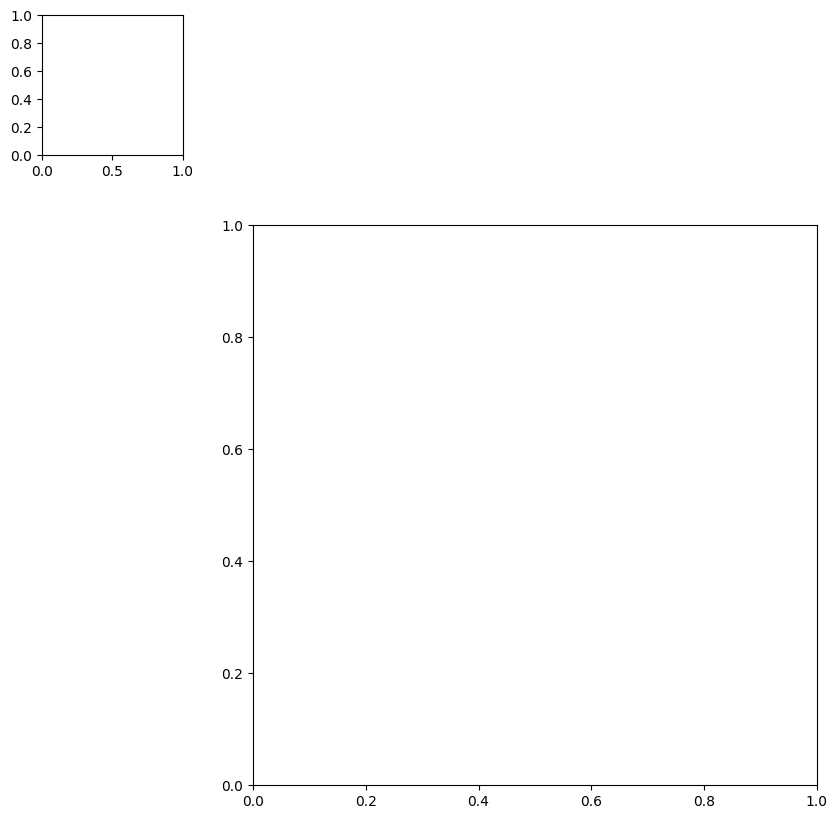

In [22]:
# See https://www.youtube.com/watch?v=crQkHHhY7aY
# corr = df.corr()
sns.clustermap(df_2021)
plt.title('Clustermap of Census Data')
plt.show()


In [ ]:
# Plot after scaling the data
sns.clustermap(df_21, standard_scale=1)
plt.title('Clustermap of Census Data')
plt.show()

# Save graph as a png file
#plt.savefig("clustermap.png")




In [ ]:
# HEATMAP
#Plot 
sns.heatmap(df_2021)
plt.title('Heatmap of Census Data')
plt.show()

# Save graph as a png file
#plt.savefig("heatmap.png")


In [ ]:
#df_2020_tracts.corr()